# Predicting NFL Success Using Combine Statistics

## Loading in Datasets and Packages

In [591]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pd.options.mode.chained_assignment = None  # default='warn'

In [592]:
combine = pd.read_csv('NFL Combine Data.csv')
combine

,Year,Name,College,Position,Height,Weight,Hand Size,Arm Length,Wonderlic,40-Yard Dash,Bench Press,Vertical Leap,Broad Jump,Shuttle,3-Cone Drill,60-Yd Shuttle
0,2018,Josh Adams,Notre Dame,RB,74.0,213,9.25,33.75,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1,2018,Ola Adeniyi,Toledo,DE,74.0,248,9.63,31.75,NaN,4.83,26.0,31.5,NaN,4.28,7.21,12.79
2,2018,Jordan Akins,Central Florida,TE,75.0,249,9.50,32.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,Jaire Alexander,Louisville,CB,71.0,192,NaN,NaN,NaN,4.38,14.0,35.0,127.0,3.98,6.71,NaN
4,2018,Austin Allen,Arkansas,QB,72.0,210,9.63,30.63,NaN,4.81,NaN,29.5,112.0,4.48,7.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,1987,Rod Woodson,Purdue,CB,72.0,202,10.50,31.00,NaN,4.33,10.0,36.0,125.0,3.98,NaN,10.92
10224,1987,John Wooldridge,Ohio State,RB,68.4,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10225,1987,David Wyman,Stanford,ILB,74.0,235,9.50,31.25,NaN,4.79,23.0,29.0,118.0,4.30,NaN,11.78
10226,1987,Theo Young,Arkansas,TE,74.0,231,9.00,34.00,NaN,4.89,9.0,30.0,107.0,4.20,NaN,11.71


In [594]:
players1 = pd.read_html('https://stathead.com/tiny/sB1mM')
players2 = pd.read_html('https://stathead.com/tiny/fzSZX')
players3 = pd.read_html('https://stathead.com/tiny/XKkWy')
players4 = pd.read_html('https://stathead.com/tiny/drzd3')
players5 = pd.read_html('https://stathead.com/tiny/49z3S')
players6 = pd.read_html('https://stathead.com/tiny/bwxaN')
players7 = pd.read_html('https://stathead.com/tiny/BCJOa')
players8 = pd.read_html('https://stathead.com/tiny/U71ht')
players9 = pd.read_html('https://stathead.com/tiny/0pwg9')
players10 = pd.read_html('https://stathead.com/tiny/5D6RC')
players = pd.concat([players1[0], players2[0], players3[0], players4[0], players5[0], players6[0], players7[0], players8[0], players9[0], players10[0]])
players

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                    Rk             Player               From   
0                    1          Tom Brady               2000   
1                    2    Peyton Manning*               1998   
2                    3       Brett Favre*               1991   
3                    4         Drew Brees               2001   
4                    5        Jerry Rice*               1987   
..                 ...                ...                ...   
99                 996         Mike Jones               1991   
100                997        Terry Kirby               1993   
101                998       Lamar Lathon               1990   
102                999      Darryll Lewis               1991   
103               1000      Ryan Longwell               1997   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                    To              Draft                 Tm   
0                 2018              6-199                NWE   
1                 2015                1-1                TOT   
2                 2010               2-33                TOT   
3                 2018               2-32                TOT   
4                 2004               1-16                TOT   
..                 ...                ...                ...   
99                2002                NaN                TOT   
100               2002               3-78                TOT   
101               1998               1-15                TOT   
102               2000               2-38                TOT   
103               2012                NaN                TOT   

    Unnamed: 6_level_0 Unnamed: 7_level_0 Games      Misc          
                    Lg                 AV     G   GS  Yrs  PB AP1  
0                  NFL                273   269  267   19  14   3  
1                  NFL                271   266  265   17  14   7  
2                  NFL                259   302  298   20  11   3  
3                  NFL                256   264  263   18  12   1  
4                  NFL                228   271  265   18  12   9  
..                 ...                ...   ...  ...  ...  ..  ..  
99                 NFL                 55   183   99   12   0   0  
100                NFL                 55   110   39   10   0   0  
101                NFL                 55   115   92    9   1   0  
102                NFL                 55   141   97   10   1   0  
103                NFL                 55   240    0   16   0   0  

[1040 rows x 13 columns]

## Data Manipulation/Joining DataFrames

In [595]:
combine = combine.drop_duplicates('Name')
#combine = combine.drop(10228)
combine['Year'] = combine['Year'].astype(int)
combine.columns = combine.columns.str.replace('(', '').str.replace(')', '').str.replace('in', '').str.replace('lbs', '')
combine

,Year,Name,College,Position,Height,Weight,Hand Size,Arm Length,Wonderlic,40-Yard Dash,Bench Press,Vertical Leap,Broad Jump,Shuttle,3-Cone Drill,60-Yd Shuttle
0,2018,Josh Adams,Notre Dame,RB,74.0,213,9.25,33.75,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1,2018,Ola Adeniyi,Toledo,DE,74.0,248,9.63,31.75,NaN,4.83,26.0,31.5,NaN,4.28,7.21,12.79
2,2018,Jordan Akins,Central Florida,TE,75.0,249,9.50,32.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,Jaire Alexander,Louisville,CB,71.0,192,NaN,NaN,NaN,4.38,14.0,35.0,127.0,3.98,6.71,NaN
4,2018,Austin Allen,Arkansas,QB,72.0,210,9.63,30.63,NaN,4.81,NaN,29.5,112.0,4.48,7.18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10223,1987,Rod Woodson,Purdue,CB,72.0,202,10.50,31.00,NaN,4.33,10.0,36.0,125.0,3.98,NaN,10.92
10224,1987,John Wooldridge,Ohio State,RB,68.4,193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10225,1987,David Wyman,Stanford,ILB,74.0,235,9.50,31.25,NaN,4.79,23.0,29.0,118.0,4.30,NaN,11.78
10226,1987,Theo Young,Arkansas,TE,74.0,231,9.00,34.00,NaN,4.89,9.0,30.0,107.0,4.20,NaN,11.71


In [596]:
players.columns = players.columns.droplevel()
players.rename(columns = {'Player':'Name'}, inplace = True)
players['Name'] = players['Name'].str.replace('*', '')
players = players.drop_duplicates('Name')
players.set_index('Rk', inplace=True)
players

,Name,From,To,Draft,Tm,Lg,AV,G,GS,Yrs,PB,AP1
Rk,,,,,,,,,,,,
1,Tom Brady,2000,2018,6-199,NWE,NFL,273,269,267,19,14,3
2,Peyton Manning,1998,2015,1-1,TOT,NFL,271,266,265,17,14,7
3,Brett Favre,1991,2010,2-33,TOT,NFL,259,302,298,20,11,3
4,Drew Brees,2001,2018,2-32,TOT,NFL,256,264,263,18,12,1
5,Jerry Rice,1987,2004,1-16,TOT,NFL,228,271,265,18,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...
996,Mike Jones,1991,2002,NaN,TOT,NFL,55,183,99,12,0,0
997,Terry Kirby,1993,2002,3-78,TOT,NFL,55,110,39,10,0,0
998,Lamar Lathon,1990,1998,1-15,TOT,NFL,55,115,92,9,1,0


In [597]:
players = players.drop(labels='Rk')

In [599]:
players['From'] = players['From'].astype(int)
players['To'] = players['To'].astype(int)
players['Draft'] = players['Draft'].astype(str)
players['Tm'] = players['Tm'].astype(str)
players['Lg'] = players['Lg'].astype(str)
players['AV'] = players['AV'].astype(int)
players['G'] = players['G'].astype(int)
players['GS'] = players['GS'].astype(int)
players['Yrs'] = players['Yrs'].astype(int)
players['PB'] = players['PB'].astype(int)
players['AP1'] = players['AP1'].astype(int)
players.sort_values('PB', ascending=False)

,Name,From,To,Draft,Tm,Lg,AV,G,GS,Yrs,PB,AP1
Rk,,,,,,,,,,,,
1,Tom Brady,2000,2018,6-199,NWE,NFL,273,269,267,19,14,3
2,Peyton Manning,1998,2015,1-1,TOT,NFL,271,266,265,17,14,7
14,Bruce Matthews,1987,2001,1-9,OTI,NFL,187,232,230,15,14,7
44,Tony Gonzalez,1997,2013,1-13,TOT,NFL,147,270,254,17,14,6
5,Jerry Rice,1987,2004,1-16,TOT,NFL,228,271,265,18,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...
469,Larry Foote,2002,2014,4-128,TOT,NFL,77,187,134,13,0,0
752,Ben Hamilton,2002,2010,4-113,TOT,NFL,63,118,110,8,0,0
470,Mike Goff,1998,2009,3-78,TOT,NFL,77,171,154,12,0,0


In [600]:
players.dtypes

Name     object
From      int64
To        int64
Draft    object
Tm       object
Lg       object
AV        int64
G         int64
GS        int64
Yrs       int64
PB        int64
AP1       int64
dtype: object

In [601]:
new_df = pd.merge(combine, players, how="left", on="Name")
df = new_df.drop(columns=['Draft', 'Wonderlic'])
df

,Year,Name,College,Position,Height,Weight,Hand Size,Arm Length,40-Yard Dash,Bench Press,...,From,To,Tm,Lg,AV,G,GS,Yrs,PB,AP1
0,2018,Josh Adams,Notre Dame,RB,74.0,213,9.25,33.75,NaN,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,Ola Adeniyi,Toledo,DE,74.0,248,9.63,31.75,4.83,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,Jordan Akins,Central Florida,TE,75.0,249,9.50,32.50,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,Jaire Alexander,Louisville,CB,71.0,192,NaN,NaN,4.38,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,Austin Allen,Arkansas,QB,72.0,210,9.63,30.63,4.81,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,1987,Rod Woodson,Purdue,CB,72.0,202,10.50,31.00,4.33,10.0,...,1987.0,2003.0,TOT,NFL,192.0,238.0,229.0,17.0,11.0,6.0
9943,1987,John Wooldridge,Ohio State,RB,68.4,193,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9944,1987,David Wyman,Stanford,ILB,74.0,235,9.50,31.25,4.79,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9945,1987,Theo Young,Arkansas,TE,74.0,231,9.00,34.00,4.89,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis and Visualizations

In [602]:
df1 = df[df['AV'].notna()]


df1['From'] = df1['From'].astype(int)
df1['To'] = df1['To'].astype(int)
df1['AV'] = df1['AV'].astype(int)
df1['G'] = df1['G'].astype(int)
df1['GS'] = df1['GS'].astype(int)
df1['Yrs'] = df1['Yrs'].astype(int)
df1['PB'] = df1['PB'].astype(int)
df1['AP1'] = df1['AP1'].astype(int)
df1

#index_names = probowl[(probowl['Year'] != probowl['From'])].index
#probowl.drop(index_names, inplace = True)


,Year,Name,College,Position,Height,Weight,Hand Size,Arm Length,40-Yard Dash,Bench Press,...,From,To,Tm,Lg,AV,G,GS,Yrs,PB,AP1
7,2018,Marcus Allen,Penn State,FS,74.00,202,NaN,NaN,NaN,15.0,...,1987,1997,TOT,NFL,73,152,102,11,2,0
190,2018,Anthony Miller,Memphis,WR,71.00,201,10.63,31.63,NaN,22.0,...,1988,1997,TOT,NFL,91,155,152,10,5,0
261,2018,Chris Warren,Texas,RB,74.00,247,10.00,32.00,4.69,25.0,...,1990,2000,TOT,NFL,71,162,91,11,3,0
495,2017,Hardy Nickerson,Illinois,LB,71.75,232,10.00,32.00,4.78,18.0,...,1987,2002,TOT,NFL,131,225,200,16,5,2
955,2015,Michael Bennett,Georgia,WR,74.00,202,10.25,33.63,4.59,NaN,...,2009,2018,TOT,NFL,64,141,100,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9901,1987,Al Smith,Utah State,OLB,72.30,228,8.75,31.25,4.66,24.0,...,1987,1996,OTI,NFL,63,125,124,10,2,1
9917,1987,Vinny Testaverde,Miami (FL),QB,76.30,213,10.00,33.50,4.75,13.0,...,1987,2007,TOT,NFL,141,233,214,21,2,0
9919,1987,Henry Thomas,Louisiana State,DT,73.80,268,10.00,32.25,4.95,18.0,...,1987,2000,TOT,NFL,113,213,199,14,2,0
9940,1987,Frank Winters,Western Illinois,C,75.00,273,9.25,32.25,5.10,20.0,...,1987,2002,TOT,NFL,86,231,147,16,1,0


In [603]:
index_names = df1[(df1['Year'] != df1['From'])].index
df1.drop(index_names, inplace = True)
player_value = df1.sort_values('AV', ascending=False)
player_value

,Year,Name,College,Position,Height,Weight,Hand Size,Arm Length,40-Yard Dash,Bench Press,...,From,To,Tm,Lg,AV,G,GS,Yrs,PB,AP1
5562,2000,Tom Brady,Michigan,QB,76.40,211,9.38,32.75,5.30,NaN,...,2000,2018,NWE,NFL,273,269,267,19,14,3
6321,1998,Peyton Manning,Tennessee,QB,77.30,230,10.13,31.50,NaN,NaN,...,1998,2015,TOT,NFL,271,266,265,17,14,7
8508,1991,Brett Favre,Southern Mississippi,QB,74.00,217,10.38,31.00,NaN,NaN,...,1991,2010,TOT,NFL,259,302,298,20,11,3
5312,2001,Drew Brees,Purdue,QB,72.30,213,10.25,31.00,4.85,NaN,...,2001,2018,TOT,NFL,256,264,263,18,12,1
6921,1996,Ray Lewis,Miami (FL),ILB,72.40,235,9.38,34.13,NaN,NaN,...,1996,2012,RAV,NFL,224,228,227,17,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589,2004,Robert Geathers,Georgia,DE,74.90,271,9.75,34.75,4.91,24.0,...,2004,2014,CIN,NFL,55,152,104,11,0,0
2909,2010,Kam Chancellor,Virginia Tech,FS,75.25,231,9.50,33.00,4.62,22.0,...,2010,2017,SEA,NFL,55,109,93,8,4,0
8896,1990,James Francis,Baylor,OLB,76.40,243,9.63,32.75,4.79,12.0,...,1990,1999,TOT,NFL,55,143,130,10,0,0
2882,2010,Eric Berry,Tennessee,FS,71.63,211,NaN,NaN,4.40,19.0,...,2010,2018,KAN,NFL,55,89,87,9,5,3


### Visualization 1

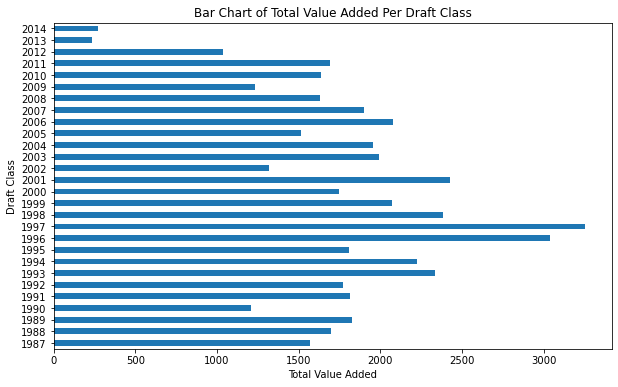

In [604]:
player_value = player_value.groupby('Year').sum()
player_value = player_value[['AV']]
player_value

f = player_value['AV'].plot(kind='barh')
f.set_title("Bar Chart of Total Value Added Per Draft Class")
f.set_xlabel('Total Value Added')
f.set_ylabel('Draft Class')
plt.show()

In [605]:
index_names = df1[(df1['Year'] != df1['From'])].index
df1.drop(index_names, inplace = True)
probowl = df1.sort_values('PB', ascending=False)
probowl

,Year,Name,College,Position,Height,Weight,Hand Size,Arm Length,40-Yard Dash,Bench Press,...,From,To,Tm,Lg,AV,G,GS,Yrs,PB,AP1
6557,1997,Tony Gonzalez,California,TE,76.10,244,9.38,35.13,4.83,NaN,...,1997,2013,TOT,NFL,147,270,254,17,14,6
6321,1998,Peyton Manning,Tennessee,QB,77.30,230,10.13,31.50,NaN,NaN,...,1998,2015,TOT,NFL,271,266,265,17,14,7
5562,2000,Tom Brady,Michigan,QB,76.40,211,9.38,32.75,5.30,NaN,...,2000,2018,NWE,NFL,273,269,267,19,14,3
5312,2001,Drew Brees,Purdue,QB,72.30,213,10.25,31.00,4.85,NaN,...,2001,2018,TOT,NFL,256,264,263,18,12,1
5802,1999,Champ Bailey,Georgia,CB,71.80,184,9.00,31.38,4.28,NaN,...,1999,2013,TOT,NFL,157,215,212,15,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,1998,Kyle Turley,San Diego State,OT,76.90,309,9.50,35.13,4.95,26.0,...,1998,2007,TOT,NFL,59,109,107,8,0,1
7725,1993,Mike Compton,West Virginia,C,78.50,297,10.13,34.00,5.35,16.0,...,1993,2004,TOT,NFL,61,151,119,12,0,0
7726,1993,Curtis Conway,Southern California,WR,72.30,185,8.75,31.50,NaN,NaN,...,1993,2004,TOT,NFL,77,167,144,12,0,0
7739,1993,Sean Dawkins,California,WR,75.90,213,10.00,32.25,4.61,NaN,...,1993,2001,TOT,NFL,57,140,109,9,0,0


In [606]:
probowl1 = probowl.drop(columns=['Year', 'College', 'Bench Press', 'From', 'To', 'Tm', 'Lg', 'AV', 'G', 'GS', 'Yrs', 'AP1'])
probowl1

,Name,Position,Height,Weight,Hand Size,Arm Length,40-Yard Dash,Vertical Leap,Broad Jump,Shuttle,3-Cone Drill,60-Yd Shuttle,PB
6557,Tony Gonzalez,TE,76.10,244,9.38,35.13,4.83,33.5,116.0,4.06,7.75,11.59,14
6321,Peyton Manning,QB,77.30,230,10.13,31.50,NaN,NaN,NaN,NaN,NaN,NaN,14
5562,Tom Brady,QB,76.40,211,9.38,32.75,5.30,24.5,99.0,4.38,7.20,NaN,14
5312,Drew Brees,QB,72.30,213,10.25,31.00,4.85,32.0,105.0,4.21,7.09,NaN,12
5802,Champ Bailey,CB,71.80,184,9.00,31.38,4.28,37.0,121.0,3.79,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6433,Kyle Turley,OT,76.90,309,9.50,35.13,4.95,32.0,112.0,4.43,7.75,NaN,0
7725,Mike Compton,C,78.50,297,10.13,34.00,5.35,21.5,100.0,4.77,NaN,NaN,0
7726,Curtis Conway,WR,72.30,185,8.75,31.50,NaN,NaN,NaN,NaN,NaN,NaN,0
7739,Sean Dawkins,WR,75.90,213,10.00,32.25,4.61,32.0,119.0,4.00,NaN,11.21,0


### Visualization 2

Text(0.5, 1.0, 'Total Probowls Made by Each Position')

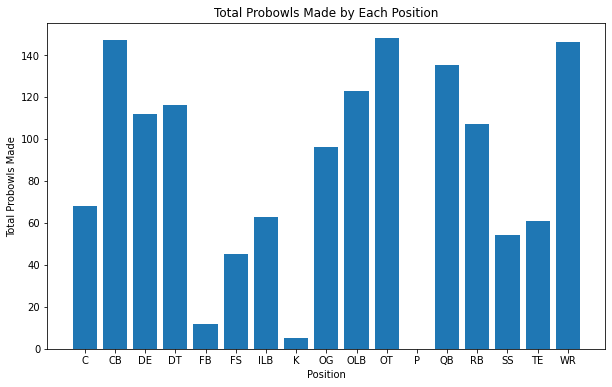

In [607]:
viz = probowl[['Name','Position','PB']]
viz_1 = viz.set_index('Name')
viz_1
visualization = viz_1.groupby('Position').sum()
visualization1 = visualization.reset_index()
x = visualization1['Position']
y = visualization1['PB']
#visualization.plot(kind='bar')
plt.bar(x,y)
plt.xlabel('Position')
plt.ylabel('Total Probowls Made')
plt.title('Total Probowls Made by Each Position')

In [608]:
df1
df2 = df1.set_index('Position')
QBs = df2.loc['QB']
QBs.head()

,Year,Name,College,Height,Weight,Hand Size,Arm Length,40-Yard Dash,Bench Press,Vertical Leap,...,From,To,Tm,Lg,AV,G,GS,Yrs,PB,AP1
Position,,,,,,,,,,,,,,,,,,,,,
QB,2012,Kirk Cousins,Michigan State,74.63,214,9.88,31.75,4.84,NaN,28.5,...,2012,2018,TOT,NFL,55,78,73,7,1,0
QB,2012,Andrew Luck,Stanford,76.00,234,10.00,32.63,4.59,NaN,36.0,...,2012,2018,CLT,NFL,80,86,86,6,4,0
QB,2012,Ryan Tannehill,Texas A&M,75.88,221,9.00,32.63,4.65,NaN,NaN,...,2012,2018,MIA,NFL,61,88,88,6,0,0
QB,2012,Russell Wilson,Wisconsin,70.63,204,10.25,31.00,4.53,NaN,34.0,...,2012,2018,SEA,NFL,114,112,112,7,6,0
QB,2011,Andy Dalton,Texas Christian,74.00,215,9.50,31.75,4.83,NaN,29.5,...,2011,2018,CIN,NFL,93,120,120,8,3,0


### Visualization 3

posx and posy should be finite values
posx and posy should be finite values


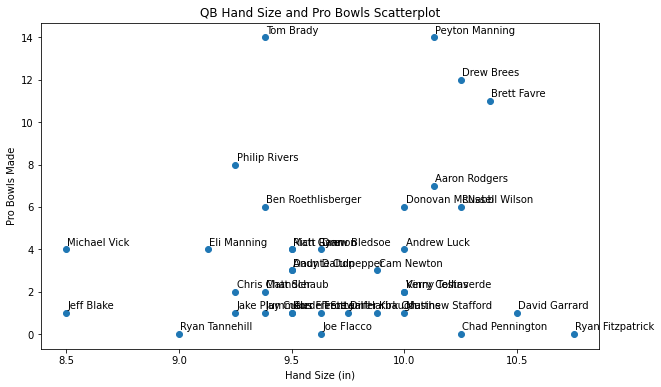

In [609]:
QBviz = QBs
x = QBviz['Hand Size']
y = QBviz['PB']
plt.scatter(x,y)
plt.xlabel('Hand Size (in)')
plt.ylabel('Pro Bowls Made')
plt.title('QB Hand Size and Pro Bowls Scatterplot')
plt.rcParams["figure.figsize"] = (10,6)
for line in range(0,QBviz.shape[0]):
    plt.text(QBviz['Hand Size'][line]+0.005, QBviz['PB'][line]+0.200, QBviz['Name'][line])
plt.show()

### Visualization 4

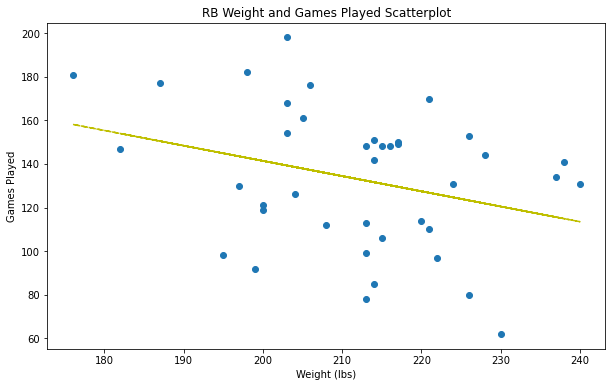

In [610]:
#use RB weight to see if it can predict longer careers for RBs (durability)
RBs = df2.loc['RB']
RBviz = RBs.set_index('Name')
x = RBviz['Weight']
y = RBviz['G']
plt.scatter(x,y)
plt.xlabel('Weight (lbs)')
plt.ylabel('Games Played')
plt.title('RB Weight and Games Played Scatterplot')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"y--")
plt.show()

In [611]:
#do a graph looking at which positions 40-yard dash is most important for
speed = df1[['Position', '40-Yard Dash', 'PB']]
speed.sort_values('Position')



,Position,40-Yard Dash,PB
3064,C,5.25,7
4888,C,5.31,1
6313,C,5.32,6
6156,C,5.15,1
8492,C,5.37,0
...,...,...,...
2370,WR,4.37,4
4866,WR,4.40,7
3803,WR,4.38,6
5592,WR,4.48,1


### Visualization 5

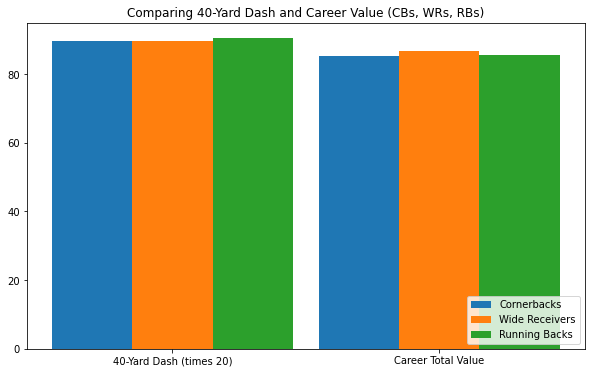

In [612]:
#WRs = df2.loc['WR']
#CBs = df2.loc['CB']
df3 = df2.sort_values('Position')
CBs = df3.loc['CB']
WRs = df3.loc['WR']
RBs = df3.loc['RB']
CBs_WRs = CBs.append(WRs)
CBs_WRs_RBs = CBs_WRs.append(RBs)
CBs_WRs_RBs = CBs_WRs_RBs[['Name', '40-Yard Dash', 'AV']]
CBs_WRs_RBs

speed_viz = CBs_WRs_RBs.groupby('Position').mean()
speed_viz
#speed_viz.loc['CB']['AV']

X = ['40-Yard Dash (times 20)','Career Total Value']
CB_scores = [speed_viz.loc['CB']['40-Yard Dash']*20, speed_viz.loc['CB']['AV']]
WR_scores = [speed_viz.loc['WR']['40-Yard Dash']*20, speed_viz.loc['WR']['AV']]
RB_scores = [speed_viz.loc['RB']['40-Yard Dash']*20, speed_viz.loc['RB']['AV']]
  
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.3, CB_scores, 0.3, label = 'Cornerbacks')
plt.bar(X_axis, WR_scores, 0.3, label = 'Wide Receivers')
plt.bar(X_axis + 0.3, RB_scores, 0.3, label = 'Running Backs')
plt.xticks(X_axis, X)
plt.title("Comparing 40-Yard Dash and Career Value (CBs, WRs, RBs)")
plt.legend(loc='lower right')
plt.show()

In [613]:
OTs = df2.loc['OT']
OGs = df2.loc['OG']
Cs = df2.loc['C']
linemen = OTs.append(OGs)
offensive_linemen = linemen.append(Cs)
offensive_linemen = offensive_linemen.sort_values('Position', ascending=True)
offensive_linemen

,Year,Name,College,Height,Weight,Hand Size,Arm Length,40-Yard Dash,Bench Press,Vertical Leap,...,From,To,Tm,Lg,AV,G,GS,Yrs,PB,AP1
Position,,,,,,,,,,,,,,,,,,,,,
C,1987,Frank Winters,Western Illinois,75.00,273,9.25,32.25,5.10,20.0,25.5,...,1987,2002,TOT,NFL,86,231,147,16,1,0
C,2001,Roberto Garza,Texas A&M-Kingsville,74.10,303,10.00,32.50,5.01,37.0,32.5,...,2001,2014,TOT,NFL,82,206,176,14,0,0
C,2003,Dan Koppen,Boston College,74.60,297,8.50,31.38,5.31,27.0,28.5,...,2003,2012,TOT,NFL,87,136,132,10,1,0
C,2004,Scott Wells,Tennessee,73.90,300,9.75,31.63,5.26,31.0,31.0,...,2004,2014,TOT,NFL,77,146,135,11,1,0
C,2004,Nick Hardwick,Purdue,75.50,295,9.75,32.88,5.20,27.0,34.0,...,2004,2014,SDG,NFL,82,136,136,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OT,1998,Tra Thomas,Florida State,79.80,349,10.25,36.50,NaN,24.0,NaN,...,1998,2009,TOT,NFL,91,174,168,12,3,0
OT,1998,Ephraim Salaam,San Diego State,78.10,300,9.75,35.13,NaN,18.0,28.0,...,1998,2010,TOT,NFL,67,163,129,13,0,0
OT,1998,Jason Fabini,Cincinnati,78.40,314,11.00,34.25,5.63,20.0,25.5,...,1998,2008,TOT,NFL,65,152,129,11,0,0


### Visualization 6

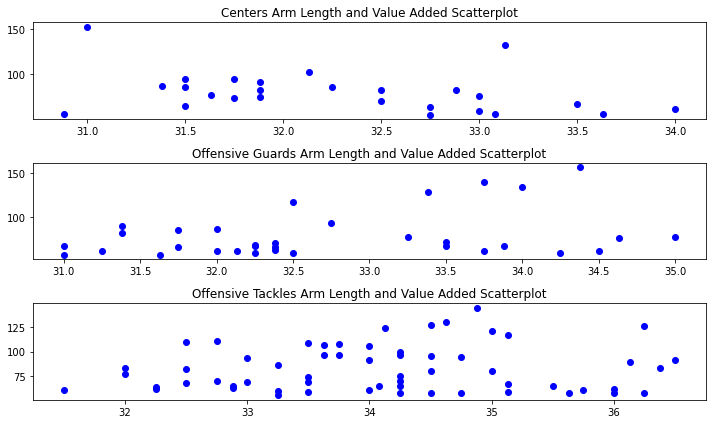

In [614]:
fig, ((ax1),(ax2), (ax3)) = plt.subplots(3)
ax1.plot(offensive_linemen.loc['C']['Arm Length'], offensive_linemen.loc['C']['AV'],'bo')
ax1.set_title('Centers Arm Length and Value Added Scatterplot')

ax2.plot(offensive_linemen.loc['OG']['Arm Length'], offensive_linemen.loc['OG']['AV'],'bo')
ax2.set_title('Offensive Guards Arm Length and Value Added Scatterplot')

ax3.plot(offensive_linemen.loc['OT']['Arm Length'], offensive_linemen.loc['OT']['AV'],'bo')
ax3.set_title('Offensive Tackles Arm Length and Value Added Scatterplot')

fig.tight_layout()
plt.show()